In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_excel('BTC_Trial.xlsx')

In [6]:
df.head()

,No,Coin,Date,Close Price,VOL_1,VOL_7,VOL_30,Market Volumn,AverageBlockSize,AverageTransactionPerBlock,Hash rate,Network Difficulty,UniqueAddresses,TransactionsPerSecond,SP500,Oil,Gold,Interest Rate,EconomicUncertainty,CryptoIndex
0,1,BTC,2024-06-01,67706.937500,0.002173,0.019801,0.052058,11641495604,1.501787,5248.439716,5.914422e+08,8.438146e+13,449639.0,7.618403,5277.51,78.96,2345.8,4.94,0.066282,72.0
1,2,BTC,2024-05-31,67491.414063,0.006946,0.020094,0.053234,27387283769,1.496345,4739.668919,6.208045e+08,8.438146e+13,528690.0,4.856163,5277.51,78.96,2345.8,4.94,0.057060,73.0
2,3,BTC,2024-05-30,68364.992188,0.008247,0.020945,0.059378,29509712534,1.519309,4149.731707,5.159389e+08,8.438146e+13,499634.0,6.432899,5235.48,78.96,2366.5,4.95,0.066164,73.0
3,4,BTC,2024-05-29,67578.093750,0.005940,0.022635,0.061443,26707072906,1.505086,5295.094891,5.746637e+08,8.438146e+13,449070.0,6.519184,5266.95,80.24,2341.2,4.97,0.059248,72.0
4,5,BTC,2024-05-28,68296.218750,0.010842,0.023035,0.062350,32722265965,1.572531,4453.656716,5.620798e+08,8.438146e+13,448181.0,6.046875,5306.04,80.9,2356.5,4.96,0.066865,72.0


In [7]:
col_to_change = ['Oil', 'Interest Rate']

for col in col_to_change:
    for i in range(1, len(df)):
        if df[col][i] == '.':
            df.at[i, col] = df[col][i - 1]

In [8]:
df = df.dropna(subset= ['CryptoIndex', 'UniqueAddresses'])
df.set_index('Date', inplace= True)
df['Oil'] = df['Oil'].astype('float')
df['Interest Rate'] = df['Interest Rate'].astype('float')
df.drop('No', axis=1, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2308 entries, 2024-06-01 to 2018-02-04
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Coin                        2308 non-null   object 
 1   Close Price                 2308 non-null   float64
 2   VOL_1                       2308 non-null   float64
 3   VOL_7                       2308 non-null   float64
 4   VOL_30                      2308 non-null   float64
 5   Market Volumn               2308 non-null   int64  
 6   AverageBlockSize            2308 non-null   float64
 7   AverageTransactionPerBlock  2308 non-null   float64
 8   Hash rate                   2308 non-null   float64
 9   Network Difficulty          2308 non-null   float64
 10  UniqueAddresses             2308 non-null   float64
 11  TransactionsPerSecond       2308 non-null   float64
 12  SP500                       2308 non-null   float64
 13  Oil            

In [10]:
df.head()

,Coin,Close Price,VOL_1,VOL_7,VOL_30,Market Volumn,AverageBlockSize,AverageTransactionPerBlock,Hash rate,Network Difficulty,UniqueAddresses,TransactionsPerSecond,SP500,Oil,Gold,Interest Rate,EconomicUncertainty,CryptoIndex
Date,,,,,,,,,,,,,,,,,,
2024-06-01,BTC,67706.937500,0.002173,0.019801,0.052058,11641495604,1.501787,5248.439716,5.914422e+08,8.438146e+13,449639.0,7.618403,5277.51,78.96,2345.8,4.94,0.066282,72.0
2024-05-31,BTC,67491.414063,0.006946,0.020094,0.053234,27387283769,1.496345,4739.668919,6.208045e+08,8.438146e+13,528690.0,4.856163,5277.51,78.96,2345.8,4.94,0.057060,73.0
2024-05-30,BTC,68364.992188,0.008247,0.020945,0.059378,29509712534,1.519309,4149.731707,5.159389e+08,8.438146e+13,499634.0,6.432899,5235.48,78.96,2366.5,4.95,0.066164,73.0
2024-05-29,BTC,67578.093750,0.005940,0.022635,0.061443,26707072906,1.505086,5295.094891,5.746637e+08,8.438146e+13,449070.0,6.519184,5266.95,80.24,2341.2,4.97,0.059248,72.0
2024-05-28,BTC,68296.218750,0.010842,0.023035,0.062350,32722265965,1.572531,4453.656716,5.620798e+08,8.438146e+13,448181.0,6.046875,5306.04,80.90,2356.5,4.96,0.066865,72.0


In [11]:
df.sort_index(ascending= True, inplace= True)
df.head()

,Coin,Close Price,VOL_1,VOL_7,VOL_30,Market Volumn,AverageBlockSize,AverageTransactionPerBlock,Hash rate,Network Difficulty,UniqueAddresses,TransactionsPerSecond,SP500,Oil,Gold,Interest Rate,EconomicUncertainty,CryptoIndex
Date,,,,,,,,,,,,,,,,,,
2018-02-04,BTC,8277.009766,0.058984,0.104624,0.204218,7073549824,0.990488,975.769663,2.303314e+07,2.603077e+12,396695.0,2.048958,2648.94,64.18,1336.5,1.80,0.234505,30.0
2018-02-05,BTC,6955.270020,0.082982,0.130688,0.219808,9285289984,1.102733,1169.529730,2.393894e+07,2.603077e+12,486554.0,1.926910,2648.94,64.18,1336.5,1.80,0.248054,15.0
2018-02-06,BTC,7754.000000,0.041061,0.134668,0.221316,13999800320,1.067524,1436.000000,2.429314e+07,2.607870e+12,589897.0,2.467014,2695.14,63.48,1329.5,1.82,0.223228,40.0
2018-02-07,BTC,7621.299805,0.041213,0.136422,0.222866,9169280000,1.071722,1515.737589,2.014902e+07,2.874674e+12,489403.0,2.689236,2681.66,61.91,1314.6,1.85,0.201785,24.0
2018-02-08,BTC,8265.589844,0.030796,0.130387,0.222486,9346750464,1.048305,1322.816794,1.872001e+07,2.874674e+12,398608.0,2.386285,2581.00,61.30,1319.0,1.85,0.183604,11.0


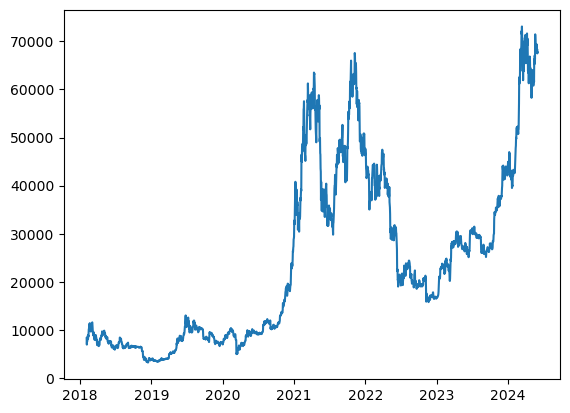

In [12]:
plt.plot(df['Close Price'])

## Univariate modelling VOL_1

In [13]:
vol1 = df['Close Price'].values
vol1

array([ 8277.009766,  6955.27002 ,  7754.      , ..., 68364.992188,
       67491.414063, 67706.9375  ])

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaled_df = scaler.fit_transform(vol1.reshape(-1,1))

In [15]:
scaled_df

array([[0.07216154],
       [0.05323811],
       [0.06467358],
       ...,
       [0.93244484],
       [0.91993777],
       [0.92302343]])

In [16]:
def df_to_X_y(df, wind_size=5):
    df_as_np = df # convert dataframe to numpy array
    X = [] 
    y = []
    for i in range(len(df_as_np) - wind_size):
        row = [a for a in df_as_np[i : i+wind_size]] 
        X.append(row)
        label = df_as_np[i+wind_size] 
        y.append(label)
    return np.array(X), np.array(y) 

In [17]:
X, y = df_to_X_y(scaled_df, 30)

In [18]:
X.shape

(2278, 30, 1)

In [19]:
y.shape

(2278, 1)

In [20]:
X_train, y_train = X[:1500], y[:1500]
X_val, y_val = X[1500 : 1800], y[1500 : 1800]
X_test, y_test = X[1800:], y[1800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((1500, 30, 1), (1500, 1), (478, 30, 1), (478, 1), (300, 30, 1), (300, 1))

In [21]:
X_train.shape[1]

30

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate= 0.001), metrics= [RootMeanSquaredError()])

In [25]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128) 

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step - loss: 0.1269 - root_mean_squared_error: 0.3545 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1373
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0264 - root_mean_squared_error: 0.1607 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 9.7249e-04 - val_root_mean_squared_error: 0.0312
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 7.9402e-04 - val_root_mean_squared_error: 0.0282
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/st

In [26]:
train_pred = model.predict(X_train).flatten()
train_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


array([0.10749829, 0.10773283, 0.10643294, ..., 0.5719277 , 0.56631386,
       0.5591199 ], dtype=float32)

In [27]:
train_pred.shape, y_train.flatten().shape

((1500,), (1500,))

In [28]:
train_result = pd.DataFrame(data= {'Train Pred':train_pred, 'Actual':y_train.flatten()})
train_result

,Train Pred,Actual
0,0.107498,0.107996
1,0.107733,0.096337
2,0.106433,0.088168
3,0.104146,0.087345
4,0.101820,0.080594
...,...,...
1495,0.590198,0.519497
1496,0.580174,0.528162
1497,0.571928,0.543046
1498,0.566314,0.525418


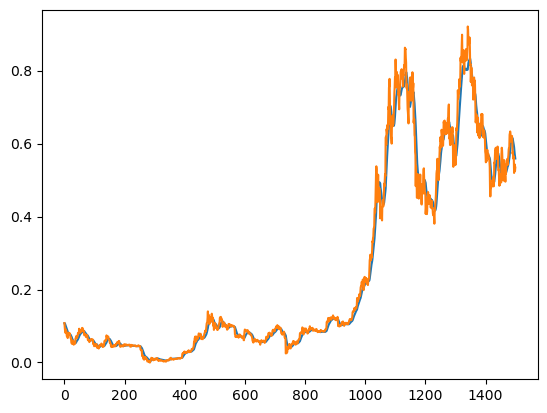

In [29]:
plt.plot(train_result['Train Pred'])
plt.plot(train_result['Actual'])

In [30]:
val_pred = model.predict(X_val).flatten()
val_result = pd.DataFrame(data= {'Val Pred':val_pred, 'Actual':y_val.flatten()})
val_result

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


,Val Pred,Actual
0,0.553974,0.532419
1,0.549256,0.522289
2,0.544020,0.538170
3,0.541496,0.547856
4,0.540619,0.546019
...,...,...
295,0.290974,0.282317
296,0.290868,0.279517
297,0.290275,0.286735
298,0.290496,0.282084


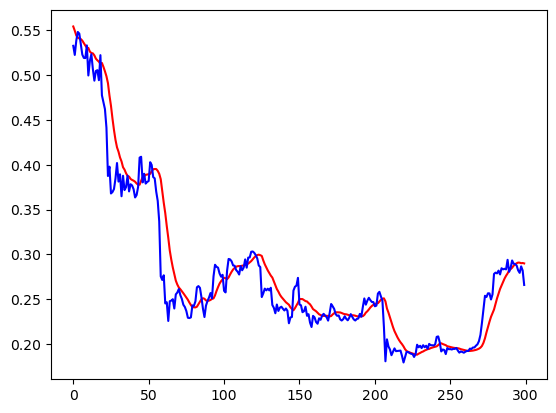

In [31]:
plt.plot(val_result['Val Pred'], c= 'red')
plt.plot(val_result['Actual'], c= 'blue')

In [32]:
test_pred = model.predict(X_test).flatten()
test_result = pd.DataFrame(data= {'Test Pred':test_pred, 'Actual':y_test.flatten()})
test_result

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Test Pred,Actual
0,0.287569,0.263640
1,0.284892,0.266786
2,0.282753,0.265602
3,0.280642,0.265887
4,0.278782,0.271796
...,...,...
473,0.881156,0.931460
474,0.882081,0.921179
475,0.881492,0.932445
476,0.881740,0.919938


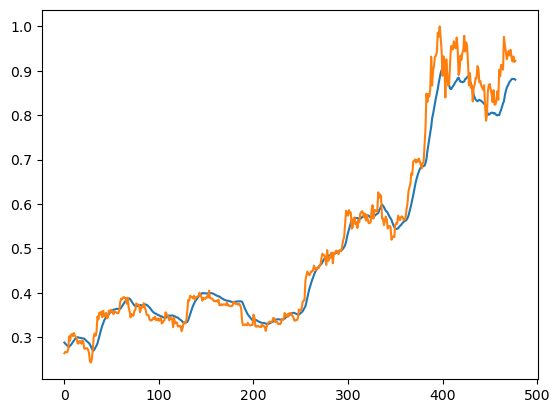

In [33]:
plt.plot(test_result['Test Pred'])
plt.plot(test_result['Actual'])

## Hyperparameter Tuning

### Using Keras tuner

In [34]:
import keras_tuner as kt
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error


### Tuning model with 2 lstm layers and 2 Dense layers 

In [35]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128])
    model.add(LSTM(lstm_units, return_sequences=True))

    dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.2, 0.4])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    
    return model

In [36]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials= 20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

Reloading Tuner from my_dir\lstm_tuning\tuner0.json


In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
lstm_units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
dropout_rate (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.4], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}


In [38]:
tuner.search(
    X_train, y_train,
    epochs=20,  
    validation_data=(X_val, y_val),
    batch_size=64  
)

In [39]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [40]:
tuner.results_summary()

Results summary
Results in my_dir\lstm_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 10 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.0
learning_rate: 0.1
Score: 0.0001700793218333274

Trial 16 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.2
learning_rate: 0.01
Score: 0.0002671511610969901

Trial 15 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.2
learning_rate: 0.01
Score: 0.0002815881744027138

Trial 04 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.0
learning_rate: 0.01
Score: 0.00030752038583159447

Trial 02 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.0
learning_rate: 0.01
Score: 0.00031659824890084565

Trial 14 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
learning_rate: 0.01
Score: 0.0003505927452351898

Trial 18 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.0
learning_rate: 0.01
Score: 0.0003669611760415137

Trial 19 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 

In [41]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The best hyperparameters are:
- lstm_units: {best_hps.get('lstm_units')}
- dropout_rate: {best_hps.get('dropout_rate')}
- learning_rate: {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete. The best hyperparameters are:
- lstm_units: 32
- dropout_rate: 0.0
- learning_rate: 0.1



In [42]:
y_test_best_pred = best_model.predict(X_test).flatten()
best_test_result = pd.DataFrame(data= {'Test Pred':y_test_best_pred, 'Actual':y_test.flatten()})

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step


In [43]:
best_test_result

,Test Pred,Actual
0,0.267822,0.263640
1,0.261712,0.266786
2,0.261103,0.265602
3,0.260461,0.265887
4,0.260233,0.271796
...,...,...
473,0.868778,0.931460
474,0.866608,0.921179
475,0.863147,0.932445
476,0.864000,0.919938


### Evaluation metrics of the model for the test set After tuning 

- The Root mean squared error of the after tunned model

In [44]:
np.sqrt(mean_squared_error(y_test, y_test_best_pred))

0.03117312277395539

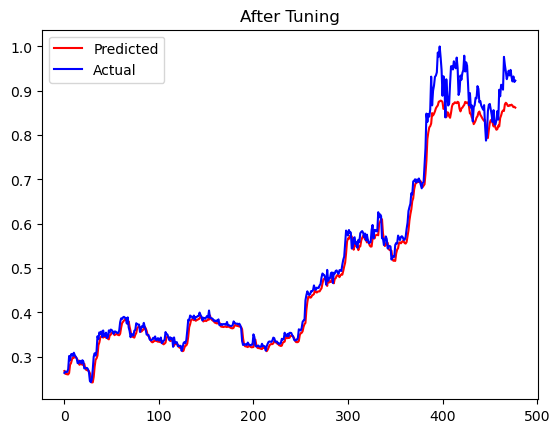

In [45]:
plt.plot(best_test_result['Test Pred'], label='Predicted', color='red')
plt.plot(best_test_result['Actual'], label='Actual', color='blue')
plt.title('After Tuning')
plt.legend(loc='upper left')

In [48]:
val_best_pred = best_model.predict(X_val).flatten()
val_best_result = pd.DataFrame(data= {'Val Pred':val_best_pred, 'Actual':y_val.flatten()})
val_best_result

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,Val Pred,Actual
0,0.523301,0.532419
1,0.522505,0.522289
2,0.516410,0.538170
3,0.524097,0.547856
4,0.532784,0.546019
...,...,...
295,0.282954,0.282317
296,0.279339,0.279517
297,0.276044,0.286735
298,0.278788,0.282084


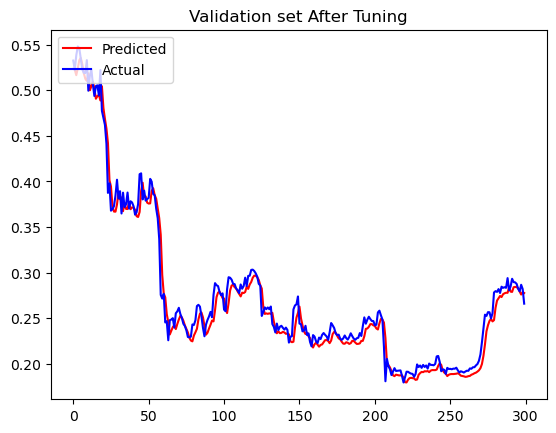

In [49]:
plt.plot(val_best_result['Val Pred'], label='Predicted', color='red')
plt.plot(val_best_result['Actual'], label='Actual', color='blue')
plt.title('Validation set After Tuning')
plt.legend(loc='upper left')

### Evaluation metrics of the model for the test set Before tuning 

- The Root mean squared error of the pre-tunned model

In [46]:
np.sqrt(mean_squared_error(y_test, test_pred))

0.036996644953624376

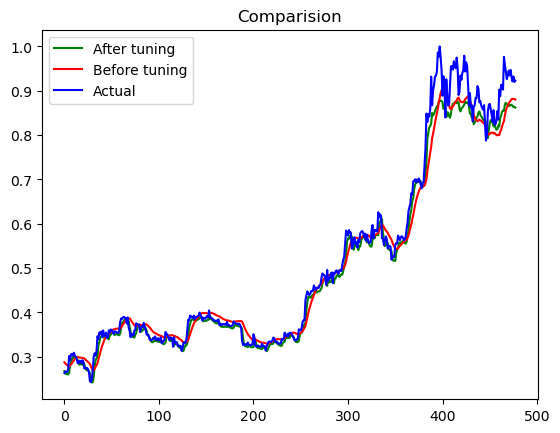

In [47]:
plt.plot(best_test_result['Test Pred'], label='After tuning', color='green')
plt.plot(test_result['Test Pred'], label='Before tuning', color='red')
plt.plot(test_result['Actual'], label='Actual', color='blue')
plt.title('Comparision')
plt.legend(loc='upper left')

### Tuning model with 2 lstm layers and 2 Dense layers (with #Epoch, Batch size and Dense units and activation function ) 

### Tuning model with 1 lstm layers and 2 Dense layers 